In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,GlobalAveragePooling2D
#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
# Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [3]:
## Set Path Here before running the code
WORKING_DIRECTORY =  "C:/Users/T PRASOONA LEHARI/Desktop/FINAL_MP_DATASET"

##  Name of classes
CLASSES = ['Mild_Demented',
           'Moderate_Demented',
           'Non_Demented',
           'Very_Mild_Demented']

In [4]:
X, y = [], []

## Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

#   Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(WORKING_DIRECTORY, target_size=(150, 150),batch_size=6400, shuffle=True)

### Seperate Dataset from  Data Genrator
X, y = train_dataset.next()

Found 1000 images belonging to 4 classes.


In [5]:
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np

# Stratified split into training (80%) and rest (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Stratified split the rest into validation (50% of the remaining) and testing (50% of the remaining)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Print number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")
print("Train     \t", sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t", sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t", sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 200), (1, 200), (2, 200), (3, 200)]
Validation	 [(0, 25), (1, 25), (2, 25), (3, 25)]
Test      	 [(0, 25), (1, 25), (2, 25), (3, 25)]


In [6]:
print("Number of samples in each class:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

#   class labels as per indices
print("Classes Names according to index:\t", train_dataset.class_indices)

Number of samples in each class:	 [(0, 250), (1, 250), (2, 250), (3, 250)]
Classes Names according to index:	 {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [7]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 150, 150, 3)
y_train shape: (800, 4)
X_test shape: (100, 150, 150, 3)
y_test shape: (100, 4)


In [10]:
from tensorflow.keras.applications import EfficientNetB0

# Create EfficientNetB0 model
model_efficientnet = EfficientNetB0(input_shape=(150, 150, 3), weights=None, classes=4)

# Compile the model
model_efficientnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training with EarlyStopping
history_efficientnet = model_efficientnet.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 255s 6s/step - loss: 3.6025 - accuracy: 0.3375 - val_loss: 1.6054 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 105s 4s/step - loss: 1.7630 - accuracy: 0.4375 - val_loss: 1.6944 - val_accuracy: 0.2500
Epoch 3/100
25/25 [==============================] - 101s 4s/step - loss: 1.4045 - accuracy: 0.5625 - val_loss: 2.2929 - val_accuracy: 0.2500
Epoch 4/100
25/25 [==============================] - 102s 4s/step - loss: 0.8472 - accuracy: 0.6675 - val_loss: 2.5059 - val_accuracy: 0.2500
Epoch 5/100
25/25 [==============================] - 105s 4s/step - loss: 0.5908 - accuracy: 0.8000 - val_loss: 1.4889 - val_accuracy: 0.2500
Epoch 6/100
25/25 [==============================] - 108s 4s/step - loss: 0.4355 - accuracy: 0.8475 - val_loss: 2.0776 - val_accuracy: 0.2500
Epoch 7/100
25/25 [==============================] - 110s 4s/step - loss: 0.2700 - accuracy: 0.9075 - val_loss: 2.3658 - val_accuracy: 0.2500
Epoch 

In [11]:
# Evaluate the model on the test set
test_loss_efficientnet, test_accuracy_efficientnet = model_efficientnet.evaluate(X_test, y_test)

4/4 [==============================] - 5s 1s/step - loss: 0.2730 - accuracy: 0.9000


In [13]:
print(f"Efficient-Net Test Accuracy: {test_accuracy_efficientnet}, Test Loss: {test_loss_efficientnet}")

Efficient-Net Test Accuracy: 0.8999999761581421, Test Loss: 0.27296340465545654


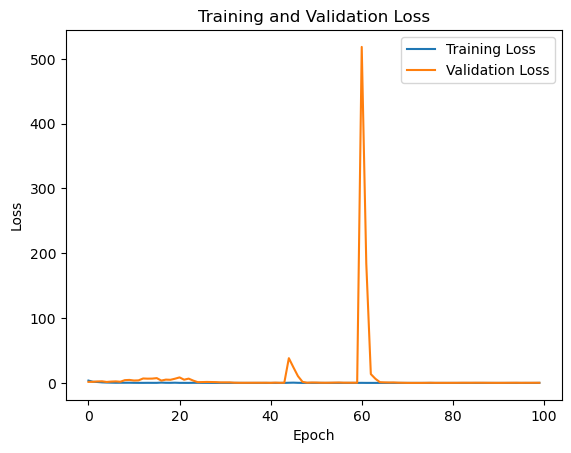

In [14]:
# Plot training and validation loss
plt.plot(history_efficientnet.history['loss'], label='Training Loss')
plt.plot(history_efficientnet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

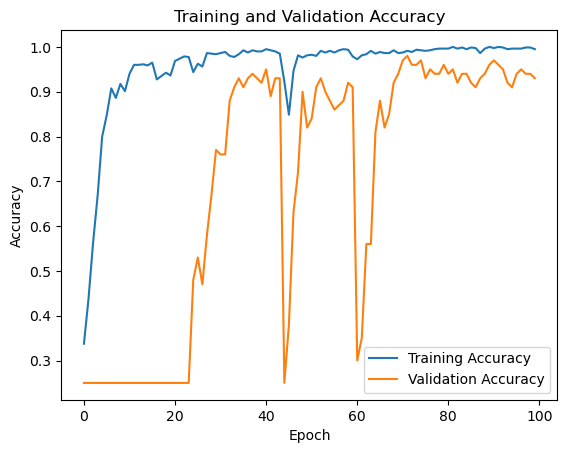

In [15]:
# Plot training and validation accuracy
plt.plot(history_efficientnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_efficientnet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

4/4 [==============================] - 30s 1s/step


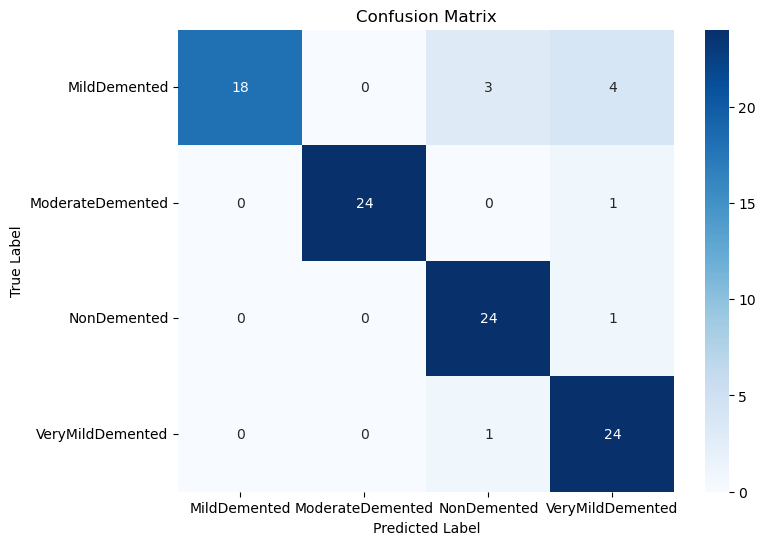

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        25
           1       1.00      0.96      0.98        25
           2       0.86      0.96      0.91        25
           3       0.80      0.96      0.87        25

    accuracy                           0.90       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100



In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generate predictions for test set
y_pred = model_efficientnet.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'], yticklabels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes))

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_user_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # rescale image
    prediction = model_efficientnet.predict(img_array)
    class_labels = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
    predicted_class = class_labels[np.argmax(prediction)]
    return predicted_class

# Example usage:
user_image_path = 'C:/Users/T PRASOONA LEHARI/Desktop/FINAL_MP_DATASET/MildDemented/mildDem25.jpg'
predicted_class = classify_user_image(user_image_path)
print(f"Predicted Class: {predicted_class}")#MildDemented

1/1 [==============================] - 0s 292ms/step
Predicted Class: MildDemented
